## Clustering

El clustering consiste en la agrupación automática de datos. Es un tipo de aprendizaje automático no-supervisado. Uno de los algoritmos de agrupamiento más popular es K-Means

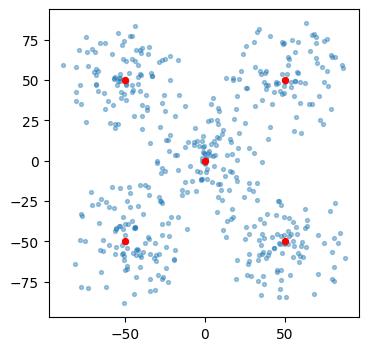

In [1]:
import sklearn
from sklearn import cluster
from matplotlib import pyplot as plt
from sklearn import datasets
import random
import math
import numpy as np
from PIL import Image



def load_points(L,D,N):
    P = np.zeros([N*len(centers),2])
    for j in range(N*len(centers)):
        i=random.choice(centers)    
        a=2*math.pi*random.random()
        R=D*random.random()
        P[j,0]=(i[0]+R*math.sin(a))
        P[j,1]=(i[1]+R*math.cos(a))
    return P

L=50
N=100
D=40
centers = [[-L, -L], [0, 0], [L, L],[-L, L], [L, -L]]
P=load_points(L,D,N)
plt.figure(figsize=(4, 4))
plt.scatter(P[:, 0], P[:, 1],s=8, alpha=0.4)
for i in centers:
    plt.scatter(i[0], i[1],s=18, color="red" )



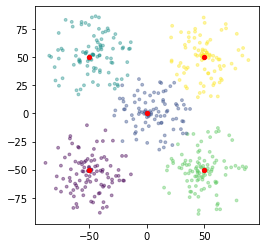

In [2]:
kmeans = cluster.KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(P)
plt.figure(figsize=(4, 4))
plt.scatter(P[:, 0], P[:, 1],s=8, alpha=0.4, c=y_pred)
for i in centers:
    plt.scatter(i[0], i[1],s=18, color="red" )

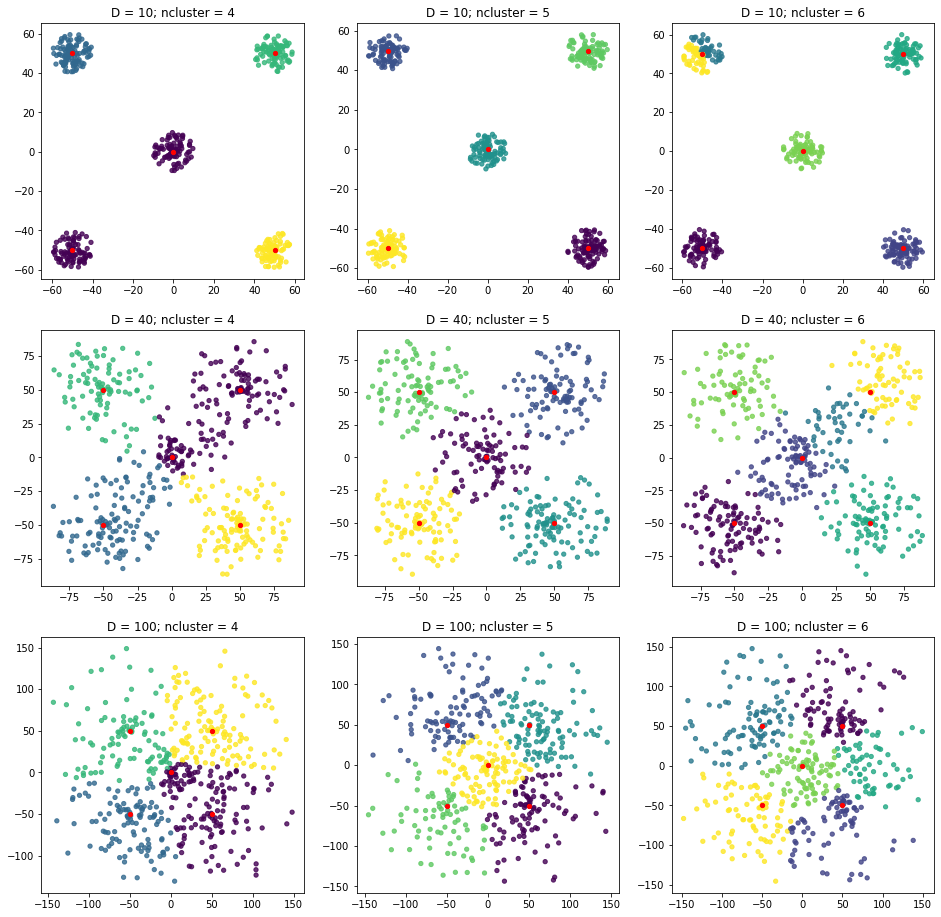

In [3]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize = (16, 16))

for AX , D in zip([[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]],[10,40,100]):
    for ax, icluster in zip(AX,[4,5,6]):
        P=load_points(L,D,N)
        kmeans = cluster.KMeans(n_clusters=icluster)
        y_pred = kmeans.fit_predict(P)
        ax.set_title("D = "+str(D)+"; ncluster = "+str(icluster))
        ax.scatter(P[:, 0], P[:, 1],s=18, alpha=0.8, c=y_pred)
        for i in centers:
            ax.scatter(i[0], i[1],s=18, color="red" )
plt.show()

Podemos urilizar KMeans para comprimir una imágen, por ejemplo tenemos:

<img src="Las_Meninas_01.jpg" ALIGN="left"  width="400" height="460">

Text(0.5, 1.0, 'image_compressed2')

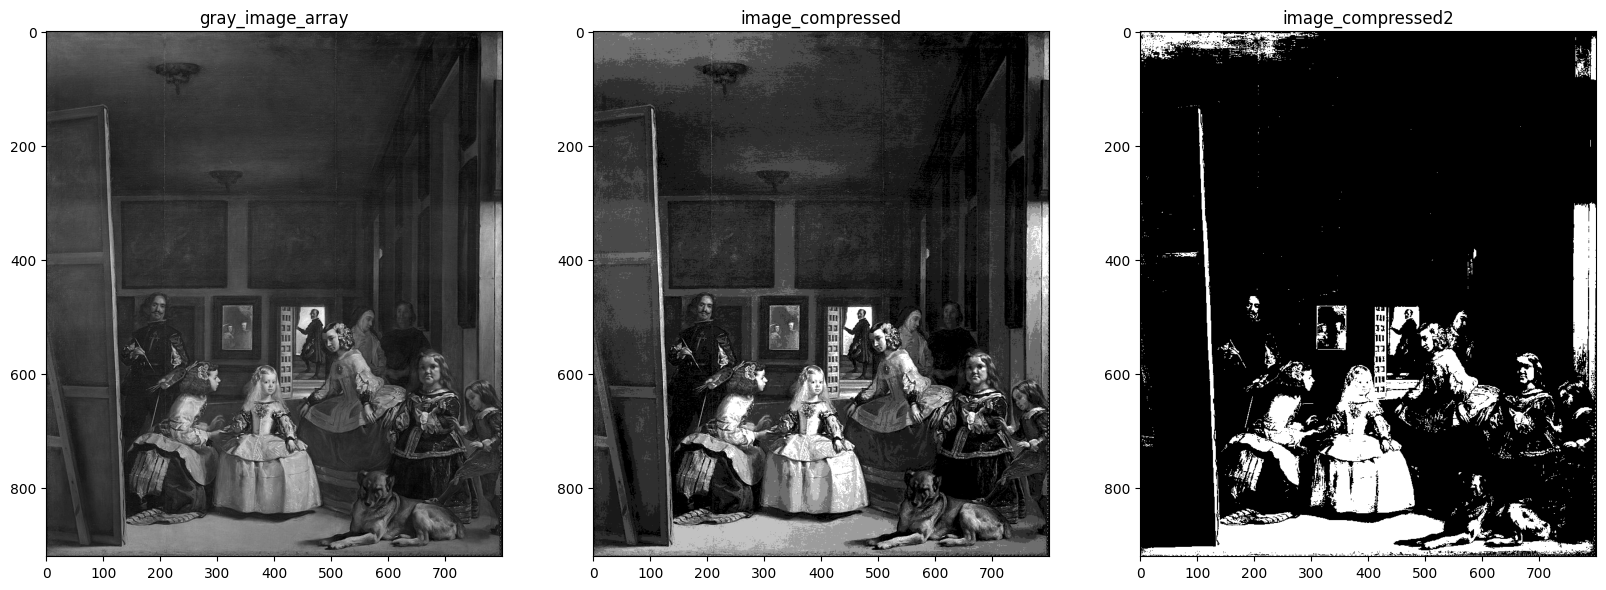

In [3]:
image=Image.open('Las_Meninas_01.jpg')
gray_image=image.convert('L') #convertimos la imagen a escala de grises
gray_image_array=np.asarray(gray_image) #pasamos la imagen a un np.array
X = gray_image_array.reshape((-1, 1)) 

k_means = cluster.KMeans(n_clusters=8, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
image_compressed = np.choose(labels, values)
image_compressed.shape = gray_image_array.shape

k_means2 = cluster.KMeans(n_clusters=2, n_init=4)
k_means2.fit(X)
values2 = k_means2.cluster_centers_.squeeze()
labels2 = k_means2.labels_

image_compressed2 = np.choose(labels2, values2)
image_compressed2.shape = gray_image_array.shape

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20, 8))
ax1.imshow(gray_image_array, cmap=plt.cm.gray, vmin=gray_image_array.min(), vmax=gray_image_array.max())
ax1.set_title("gray_image_array")
ax2.imshow(image_compressed, cmap=plt.cm.gray, vmin=image_compressed.min(), vmax=image_compressed.max())
ax2.set_title("image_compressed")
ax3.imshow(image_compressed2, cmap=plt.cm.gray, vmin=image_compressed2.min(), vmax=image_compressed2.max())
ax3.set_title("image_compressed2")

